# Prevendo chance de doença cardíaca usando rede neural

## Metadados

### Age : Idade do paciente

### Sex : Sexo do paciente

### exang: angina induzida por exercício (1 = yes; 0 = no)

### ca: número majoritário de vasos (0-3)

### cp : Tipo de dor no peito

### - Value 1: angina típica
### - Value 2: angina atípica
### - Value 3: sem dor de angina
### - Value 4: asimtomático
### trtbps : pressão sanguínea em repouso (in mm Hg)

### chol : concentração de colesterol em mg/dl obtido via BMI sensor

### fbs : (açúcar no sangue em jejum > 120 mg/dl) (1 = true; 0 = false)

### rest_ecg : resultado do eletrocardiograma em repouso
###  - Valor 0: normal
###  - Valor 1: tendo anormalidade da onda ST-T (inversões da onda T e / ou elevação ou depressão ST> 0,05 mV)
###  - Valor 2: smostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
###  - thalach: frequência cardíaca máxima alcançada

### alvo: 0 = menos chance de ataque cardíaco 1 = mais chance de ataque cardíaco

## Sumário 
### 1.0 Carregando dados
### 1.1 Alguns insights
### 2.0 Transformação
### 2.1 Separando o daset em features e target
### 2.2 Reescalando os dados
### 2.3 Craindo conjunto de dados treino e teste
### 2.4 Construindo o modelo de rede neural
### 3.0 Rondando o modelo
### 3.1 Métricas

# Carregando bibliotecas

In [118]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.4.1'

# 1.0 Carregando dados

In [119]:
heart_df = pd.read_csv('heart.csv')

In [120]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [121]:
# Mostrando as principais informações  das colunas do dataset
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 1.1 Alguns insights

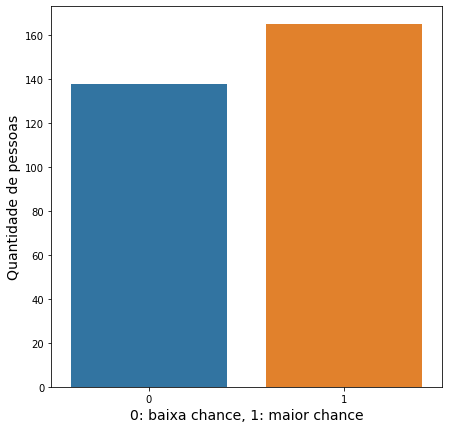

In [122]:
# Exibindo a quantidade do número de pessoas com baixa chance de ter problema cardíacos, classe 0,
# e com maior chance de ter ploblemas cardíacos, classe 1.
plt.figure(figsize=(7, 7))
sns.countplot(x = 'output', data = heart_df)
plt.xlabel("0: baixa chance, 1: maior chance", fontsize=14)
plt.ylabel("Quantidade de pessoas", fontsize=14);

### As duas classe são bem balenceadas, isso reduz a chance do algoritmo de machine learning fazer classificações tendênciosas.

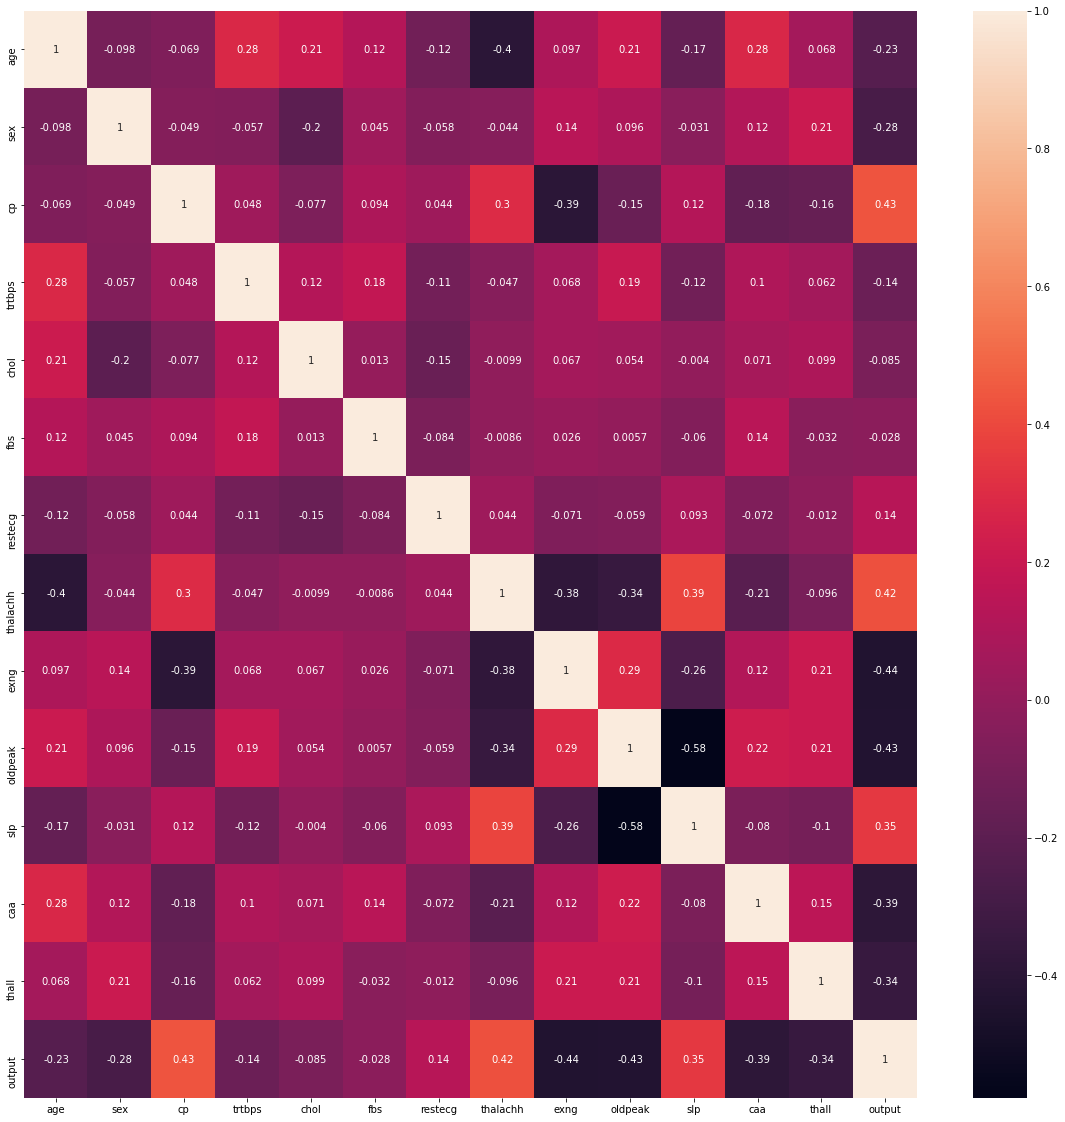

In [124]:
# Mostrando a correlação de todas as features com 'output'
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(heart_df.corr(), annot = True);

### Intessante notar que a correlação de todas as features é sempre menor do que 0.5, exibindo assim baixa correlação entre si.

# 2.0 Transformação

## 2.1 Separando o dataset em features e target

In [125]:
# Separando o dataset
X = heart_df.drop('output', axis=1)
y = heart_df['output']

In [126]:

X.shape

(303, 13)

In [127]:
y.shape

(303,)

## 2.2 Reescalando os dados

In [128]:
# Vamos reescalar os valores dos dados para o intervalo de 0, 1. Isso ajuda na melhoria do apredizagem do algoritmo.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [129]:
# Convertendo de target valores para forma  requerida pelo algorítmo
y = y.values.reshape(-1,1)

## 2.3 Criando conjunto de dados treino e teste

In [130]:
# Dividindo os dados features e target em parte treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25)

## 2.4 Construindo o modelo de rede neural

In [131]:
# Construindo rede neural de calssificação dos dados.
# A camada mais externo é construida para conportar as 13 features de entrada X_train com 400 neurônios
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(13, )))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(units=400, activation='relu')) # Camada interna possuie 400 neurônios
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # A rede deve ter como valor  de saida apenas o valor da classse.

In [132]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 400)               5600      
_________________________________________________________________
dropout_9 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 400)               160400    
_________________________________________________________________
dropout_10 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 401       
Total params: 166,401
Trainable params: 166,401
Non-trainable params: 0
_________________________________________________________________


# 3.0 Rodando o modelo

In [133]:
# Usaremos a função Adam para otimizar a apredizagem do algoritmo, na learning rate usuaremos binary_crossentropy e a métrica de avaliação será a acuracia.
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [134]:
epochs_hist = classifier.fit(X_train, y_train, epochs = 200)

Epoch 1/200
8/8 [==============================] - 1s 3ms/step - loss: 0.6787 - accuracy: 0.5444
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 0.5609 - accuracy: 0.7739
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 0.4428 - accuracy: 0.8254
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.8032
Epoch 5/200
8/8 [==============================] - 0s 4ms/step - loss: 0.3732 - accuracy: 0.8306
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3442 - accuracy: 0.8618
Epoch 7/200
8/8 [==============================] - 0s 4ms/step - loss: 0.3613 - accuracy: 0.8309
Epoch 8/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3432 - accuracy: 0.8677
Epoch 9/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8328
Epoch 10/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8736
Epoch 11/200
8/8 [===========

In [135]:
# Prevendo os valores das classes usando dataset X_test
y_pred = classifier.predict(X_test)

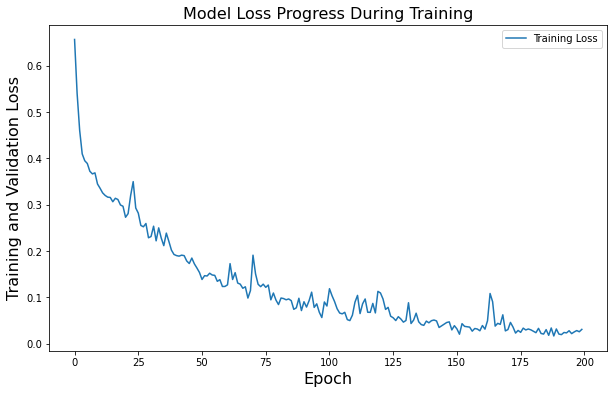

In [136]:
plt.figure(figsize = (10, 6))
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training', fontsize = 16)
plt.xlabel('Epoch', fontsize = 16)
plt.ylabel('Training and Validation Loss', fontsize = 16)
plt.legend(['Training Loss']);

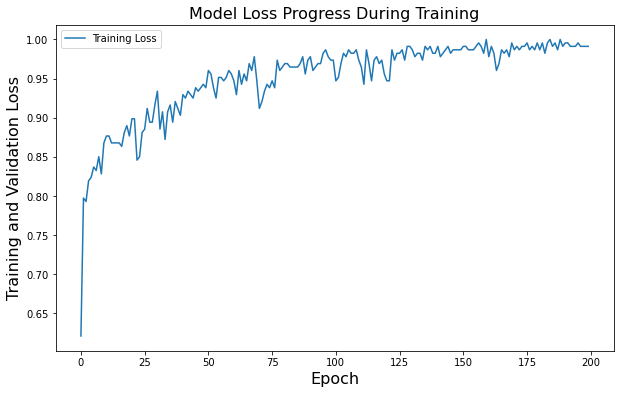

In [137]:
plt.figure(figsize = (10, 6))
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Loss Progress During Training', fontsize = 16)
plt.xlabel('Epoch', fontsize = 16)
plt.ylabel('Training and Validation Loss', fontsize = 16)
plt.legend(['Training Loss']);

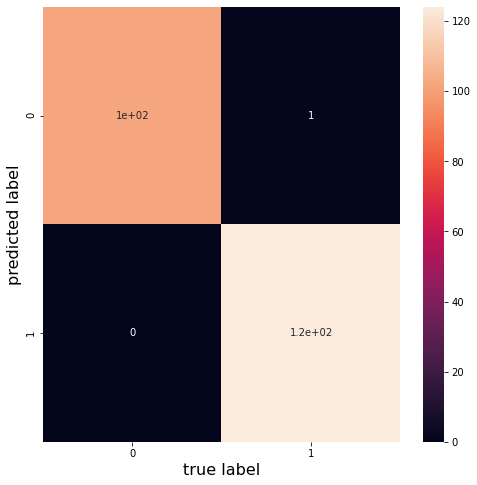

In [138]:
# Matriz de confusão da classificação usando dados de treino
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (8, 8))
y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)
plt.xlabel("predicted label", fontsize=16)
plt.ylabel("true label", fontsize=16);

### Observando a matrix de confusão, vemos que o rede neural classificou corretatamente todas as labels com quase 100 quando usamos os dados de treino. Tendo havido a ocorrência de um falso negativo.

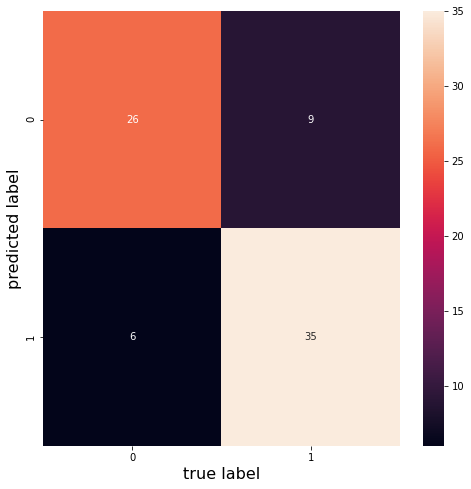

In [140]:
# Matriz de confusão da classificação usando dados de teste
plt.figure(figsize = (8, 8))
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel("predicted label", fontsize=16)
plt.ylabel("true label", fontsize=16);

### Usando os dados de teste o algoritmo classificou 35 verdadeiros positivos e 26 verdadeiros negativos corretamente contra 6 falsos positivos e 9 falsos negativos.

## 3.1 Métricas de avaliação

In [143]:
# Valores das métricas precissão, recall,  f1-score, acurácia
from sklearn.metrics import classification_report
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00       102
        True       1.00      0.99      1.00       125

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        35
           1       0.80      0.85      0.82        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76

